# Plot Time
This function will plot the n_count of a population vs. the time it was recorded.
Load the popcycle package first. Then using the "Scope 1" example data included in the github package, assign paths to `db`, `opp.dir`, and `vct.dir`.

In [10]:
library(popcycle)

## Option 1: Requires Database Access

In [11]:
path <- "/Volumes/data/data/seaflow/refilter/"
cruise <- "SCOPE_1"
db <- paste0(path,cruise,"/",cruise,".db")
opp.dir <- paste0(path,cruise,"/",cruise,"_opp")
vct.dir <- paste0(path,cruise,"/",cruise,"_vct")

## Option 2: Requires cruise files

In [5]:
path <- "/Users/John/Documents/Armbrust/"
cruise <- "SCOPE_1"
db <- paste0(path,cruise,"/",cruise,".db")
opp.dir <- paste0(path,cruise,"/",cruise,"_opp")
vct.dir <- paste0(path,cruise,"/",cruise,"_vct")

### LOAD THIS FUNCTION

In [12]:
plot.time <- function(db, population, upper.limit, lower.limit) {
    table <- get.stat.table(db)
    population.list <- subset(table, pop == population)
    population.list.filtered <- population.list[(population.list$n_count < upper.limit),]
    population.list.filtered <- population.list.filtered[(population.list.filtered$n_count > lower.limit),]
    time.stat <- as.POSIXct(population.list.filtered$time, format = "%FT%T", tz = "GMT")
    pop.count <- population.list.filtered$n_count 
    plot(time.stat, pop.count, xlab="Time", ylab="Cell Count")
} 

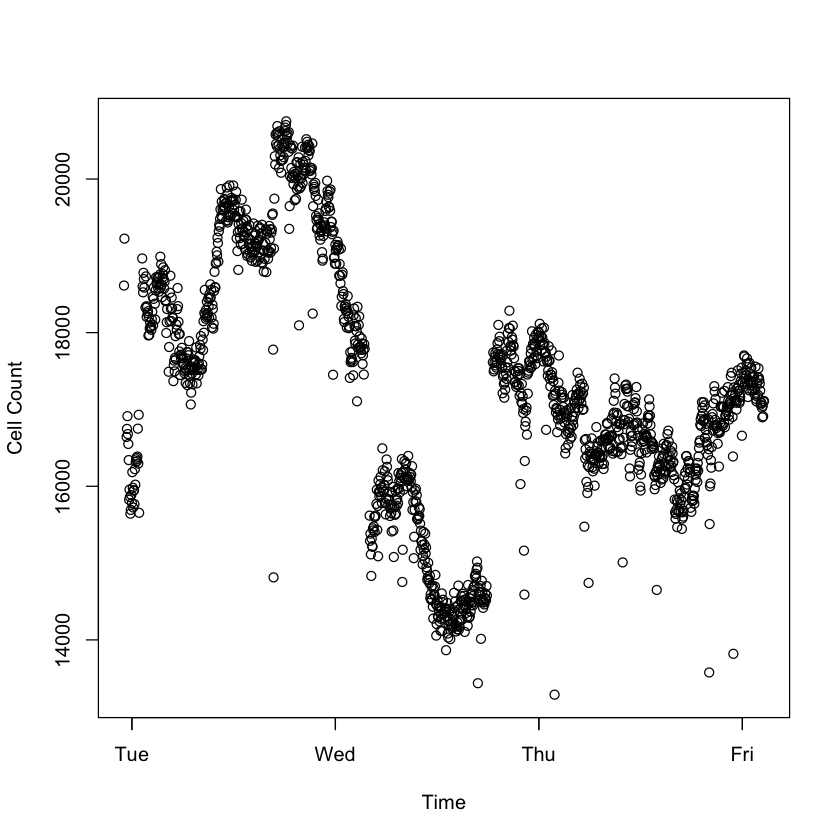

In [13]:
plot.time(db, "prochloro", 30000, 13000)

## Change Cruises

In [14]:
cruise <- "SCOPE_2"
db <- paste0(path,cruise,"/",cruise,".db")
opp.dir <- paste0(path,cruise,"/",cruise,"_opp")
vct.dir <- paste0(path,cruise,"/",cruise,"_vct")

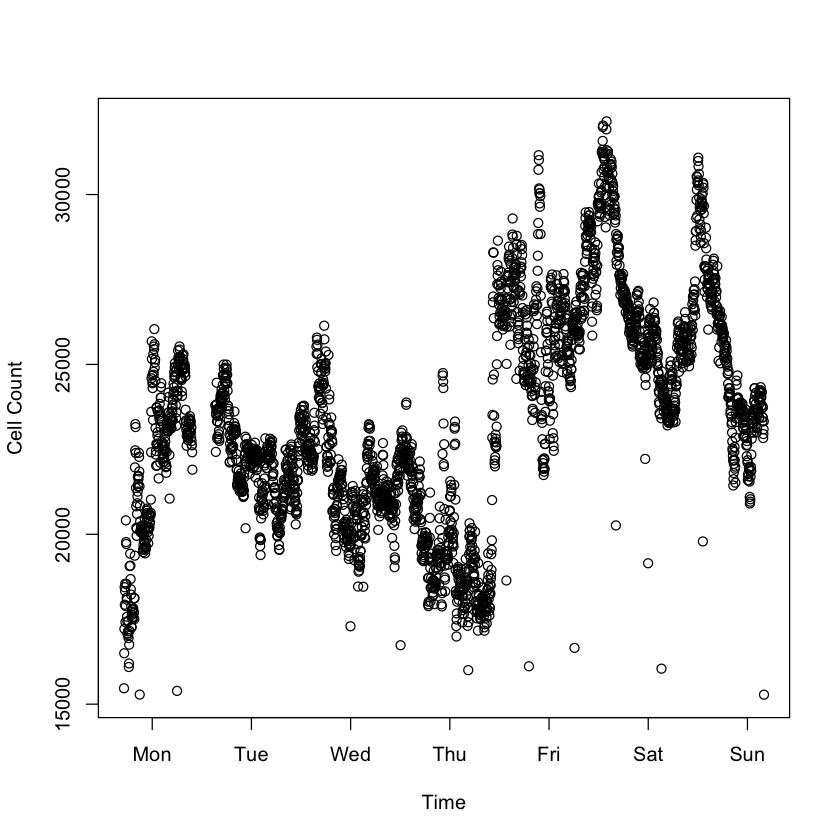

In [17]:
plot.time(db, "prochloro", 35000, 15000)

In [15]:
cruise <- "SCOPE_3"
db <- paste0(path,cruise,"/",cruise,".db")
opp.dir <- paste0(path,cruise,"/",cruise,"_opp")
vct.dir <- paste0(path,cruise,"/",cruise,"_vct")

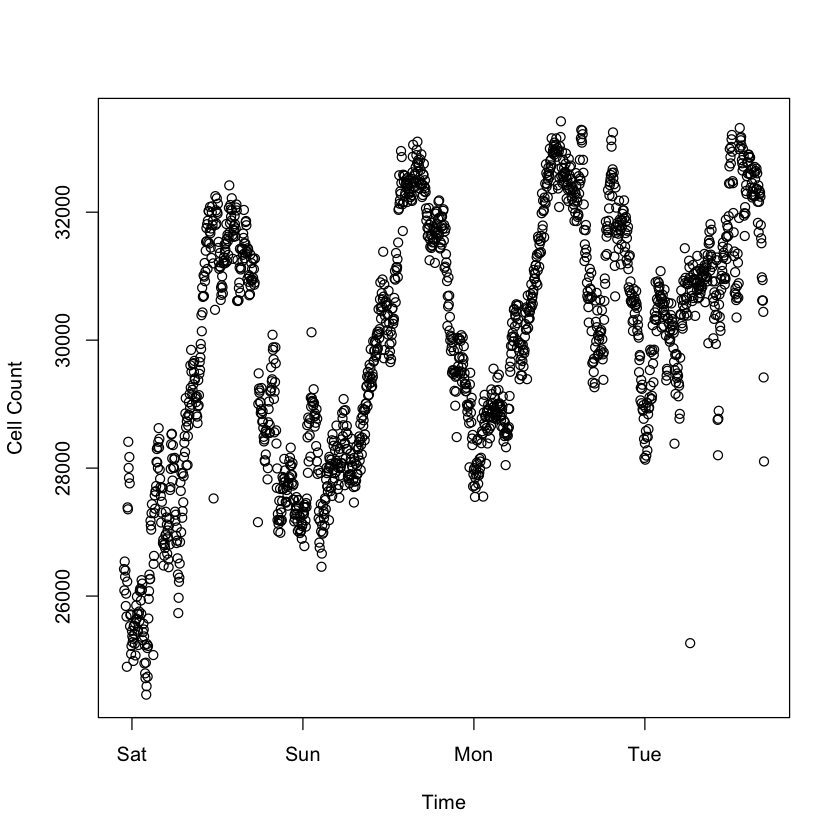

In [16]:
plot.time(db, "prochloro", 45000, 24000)

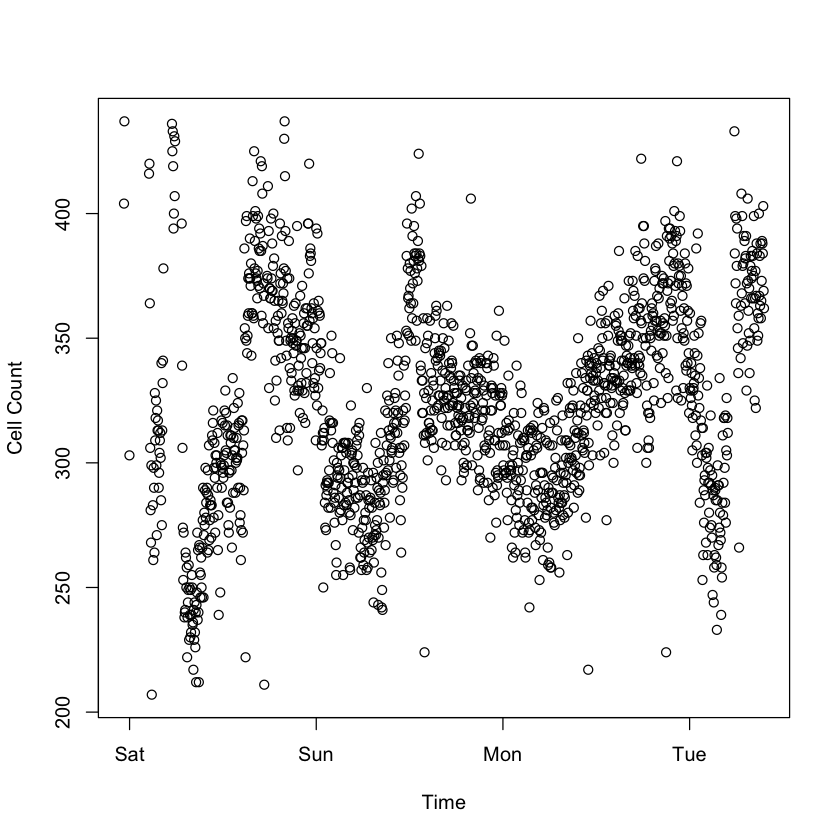

In [35]:
plot.time(db, "synecho", 450, 200)

In [17]:
library(scatterplot3d)

In [20]:
plot.time.lat <- function(db, population, upper.limit, lower.limit) {
    table <- get.stat.table(db)
    population.list <- subset(table, pop == population)
    population.list.filtered <- population.list[(population.list$n_count < upper.limit),]
    population.list.filtered <- population.list.filtered[(population.list.filtered$n_count > lower.limit),]
    
    lat <- population.list.filtered$lat
    time.stat <- as.POSIXct(population.list.filtered$time, format = "%FT%T", tz = "GMT")
    pop.count <- population.list.filtered$n_count 
    scatterplot3d(time.stat, lat, pop.count, xlab="Time", ylab="Lat", zlab="Cell Count")
} 

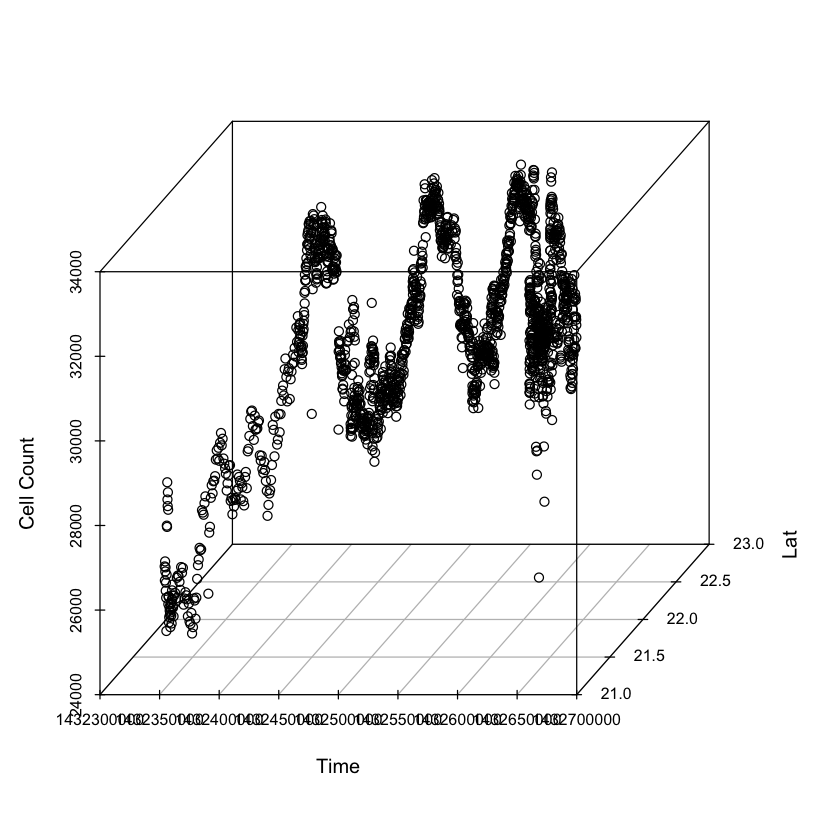

In [22]:
plot.time.lat(db, "prochloro", 45000, 24000)

In [23]:
install.packages(c("rgl", "car"))
library("car")


The downloaded binary packages are in
	/var/folders/6b/1kc5brdx3xzg3v2qkvb6d8wc0000gn/T//RtmpvShPhE/downloaded_packages


In [28]:
plot.time.lat.interactive <- function(db, population, upper.limit, lower.limit) {
    table <- get.stat.cctable(db)
    population.list <- subset(table, pop == population)
    population.list.filtered <- population.list[(population.list$n_count < upper.limit),]
    population.list.filtered <- population.list.filtered[(population.list.filtered$n_count > lower.limit),]
    
    lat <- population.list.filtered$lat
    time.stat <- population.list.filtered$time
    pop.count <- population.list.filtered$n_count 
    scatter3d(time.stat, lat, pop.count)
} 

In [29]:
plot.time.lat.interactive(db, "prochloro", 45000, 24000)

ERROR: Error in abs(x): non-numeric argument to mathematical function
